In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, 

# For Text
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Capture similarity 
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
data = pd.read_csv("data/netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## EDA

Text(0.5, 1.0, 'TV Shows VS Movies')

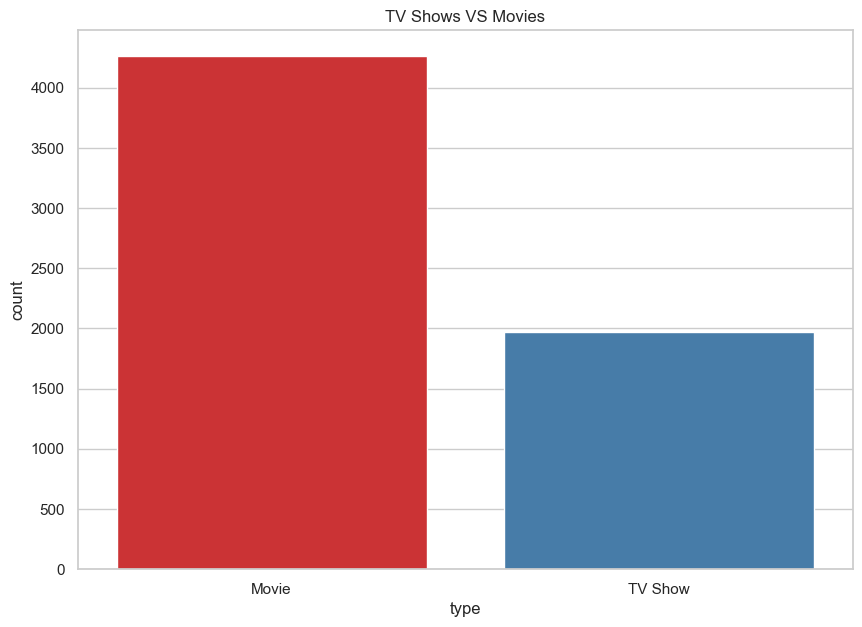

In [6]:
netflix_shows=data[data['type']=='TV Show']
netflix_movies=data[data['type']=='Movie']

plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
ax = sns.countplot(x="type", data=data, palette="Set1")
ax.set_title("TV Shows VS Movies")

### Netflix Contents Update

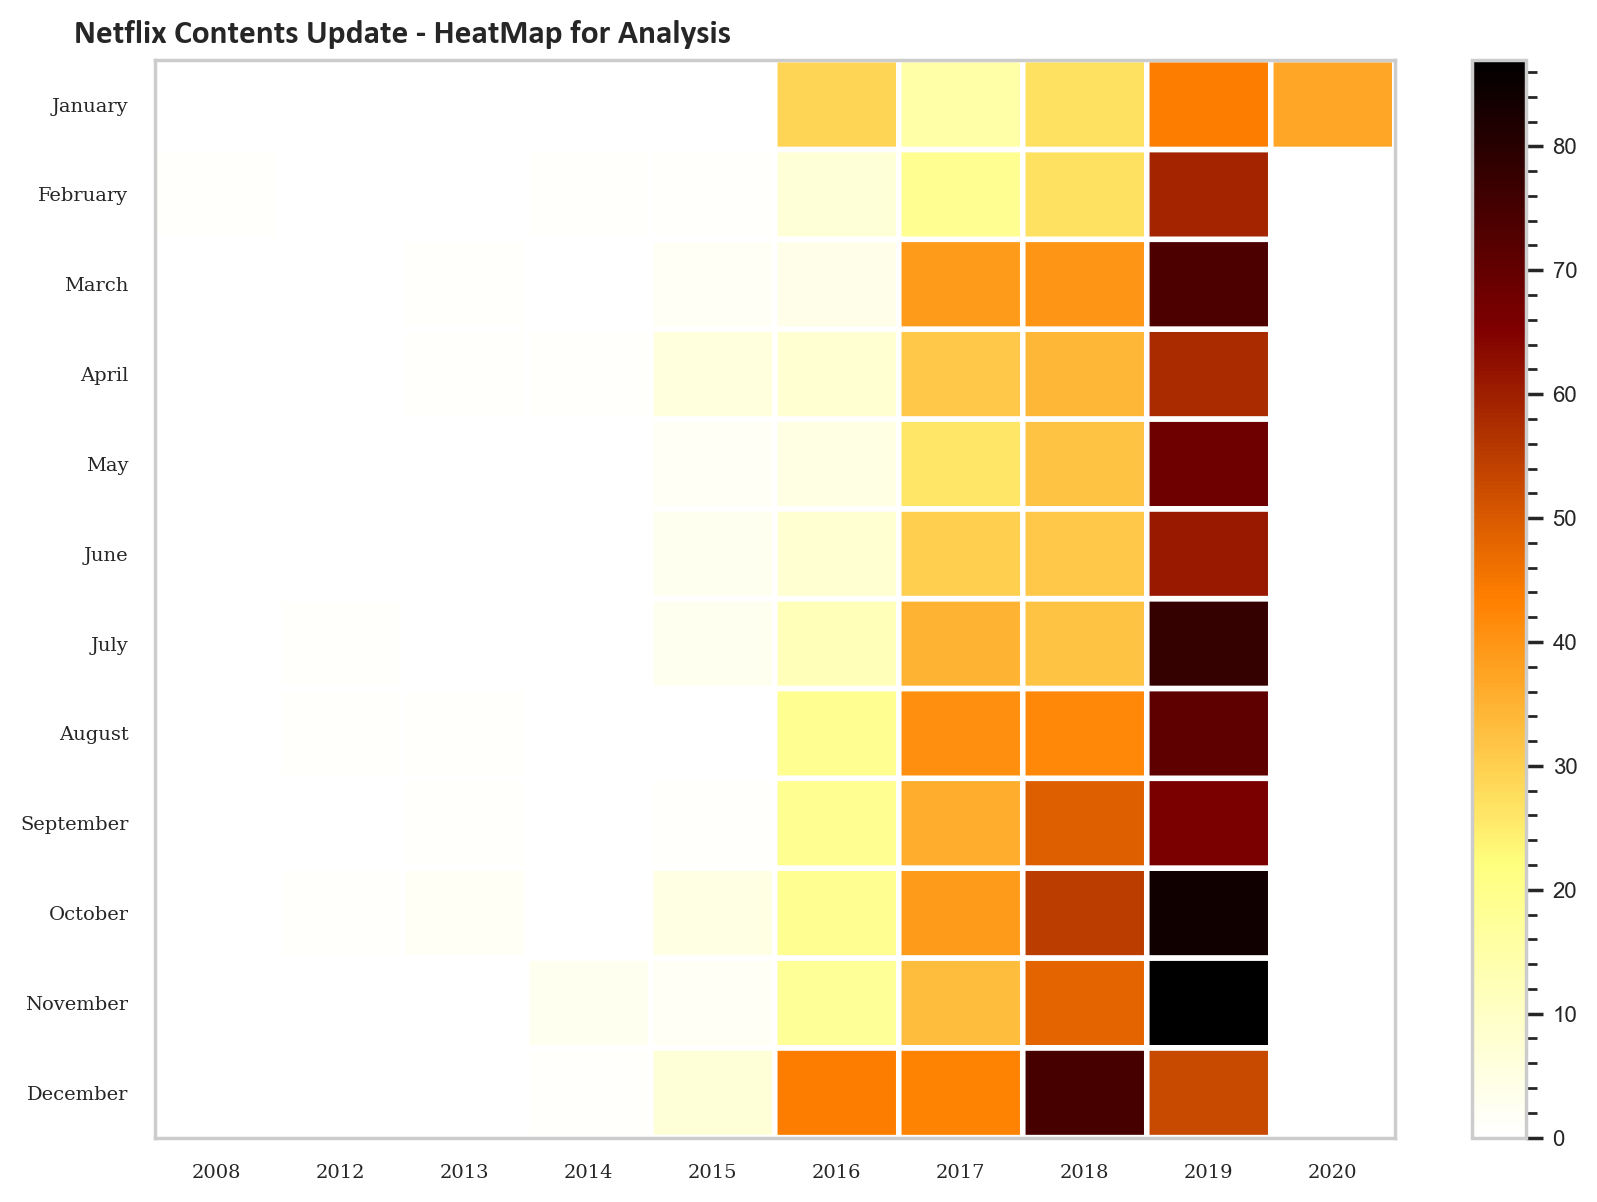

September 8, 2018


In [15]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update - HeatMap for Analysis', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

# imprime la fecha maxima de la columna date_Added
print(netflix_date['date_added'].max())

### **Movie Ratings Analysis**

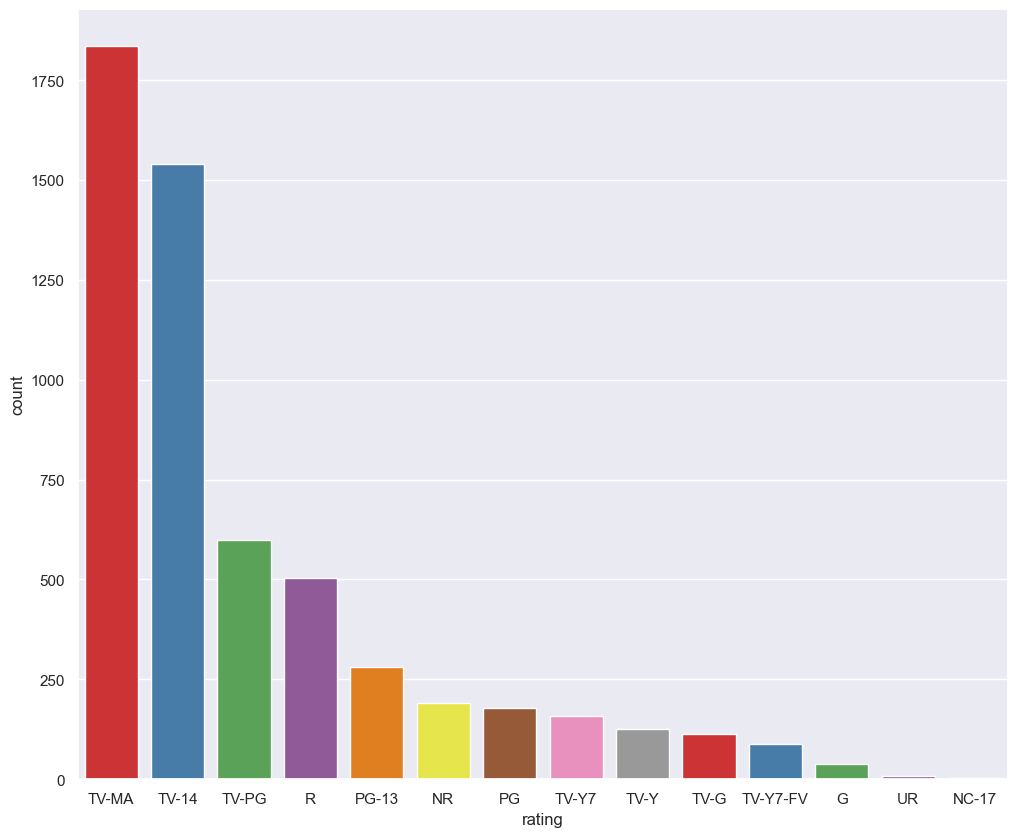

In [17]:
#Movie ratings analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=data, palette="Set1", order=data['rating'].value_counts().index[0:15])

### **Year wise analysis**

In [18]:
Last_fifteen_years = data[data['release_year']>2005 ]
Last_fifteen_years.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,combined
0,81145628,Movie,Norm of the North King Sized Adventure,"Richard Finn, Tim Maltby","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,Children Family Movies Comedies AlanMarriott...
1,80117401,Movie,Jandino Whatever it Takes,NaN,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,StandUp Comedy JandinoAsporaat Jandino Whatev...
2,70234439,TV Show,Transformers Prime,NaN,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids TV PeterCullen SumaleeMontano FrankWelke...
3,80058654,TV Show,Transformers Robots in Disguise,NaN,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids TV WillFriedle DarrenCriss ConstanceZimm...
4,80125979,Movie,realityhigh,Fernando Lebrija,United States,"September 8, 2017",2017,TV-14,99 min,Comedies NestaCooper KateWalsh JohnMichaelHig...


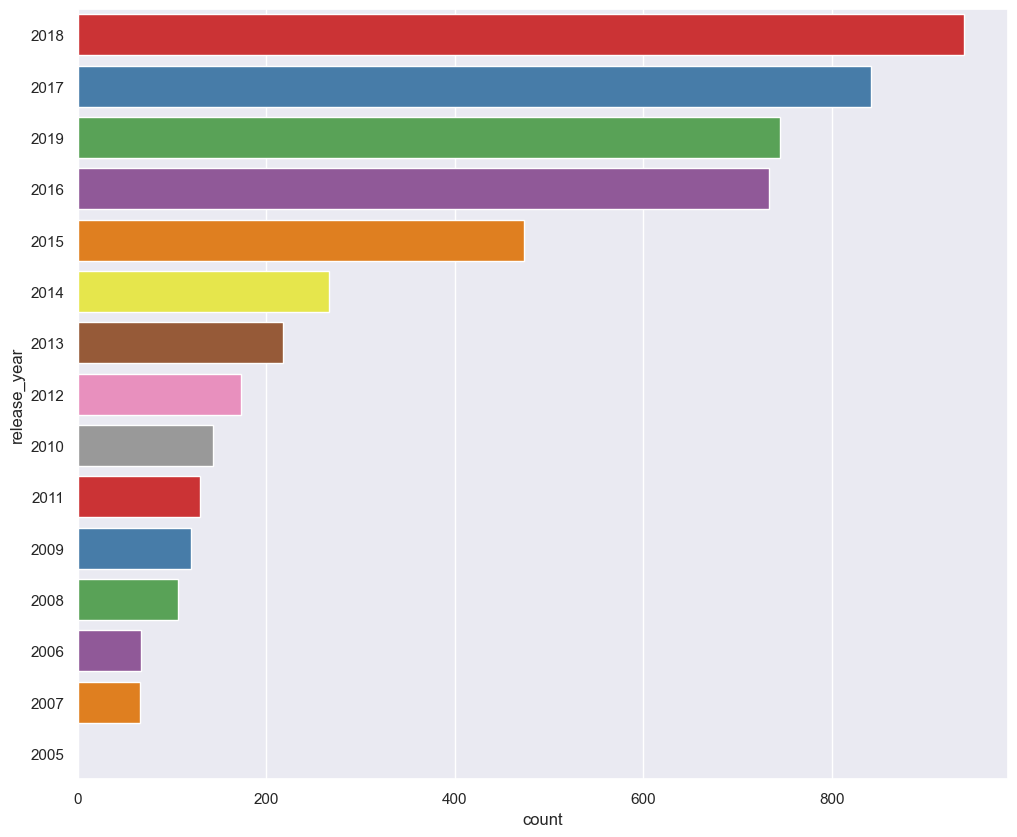

In [20]:
#Year wise analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=Last_fifteen_years, palette="Set1", order=data['release_year'].value_counts().index[0:15])

In [8]:
data.dropna(subset=['cast','title','description','listed_in'],inplace=True,axis=0)
data = data.reset_index(drop=True)

In [9]:
data['listed_in'] = [re.sub(r'[^\w\s]', '', t) for t in data['listed_in']]
data['cast'] = [re.sub(',',' ',re.sub(' ','',t)) for t in data['cast']]
data['description'] = [re.sub(r'[^\w\s]', '', t) for t in data['description']]
data['title'] = [re.sub(r'[^\w\s]', '', t) for t in data['title']]

In [10]:
data["combined"] = data['listed_in'] + '  ' + data['cast'] + ' ' + data['title'] + ' ' + data['description']
data.drop(['listed_in','cast','description'],axis=1,inplace=True)
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,combined
0,81145628,Movie,Norm of the North King Sized Adventure,"Richard Finn, Tim Maltby","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,Children Family Movies Comedies AlanMarriott...
1,80117401,Movie,Jandino Whatever it Takes,NaN,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,StandUp Comedy JandinoAsporaat Jandino Whatev...
2,70234439,TV Show,Transformers Prime,NaN,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids TV PeterCullen SumaleeMontano FrankWelke...
3,80058654,TV Show,Transformers Robots in Disguise,NaN,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids TV WillFriedle DarrenCriss ConstanceZimm...
4,80125979,Movie,realityhigh,Fernando Lebrija,United States,"September 8, 2017",2017,TV-14,99 min,Comedies NestaCooper KateWalsh JohnMichaelHig...


In [11]:
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(data["combined"])
cosine_similarities = linear_kernel(matrix,matrix)
movie_title = data['title']
indices = pd.Series(data.index, index=data['title'])

In [12]:
def content_recommender(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return movie_title.iloc[movie_indices]

In [13]:
title = 'The Crown'
suggestions = content_recommender(title)

suggestions_df = pd.DataFrame(data=suggestions)
suggestions_df

,title
369,Witches A Century of Murder
1829,London Spy
5068,Reign
2612,My Hotter Half
692,The Blue Planet A Natural History of the Oceans
3915,The Real Football Factories
1753,Collateral
5474,Lovesick
4830,Planet Earth The Complete Collection
2724,Age Gap Love


In [14]:
suggestions_df.to_csv('suggestions_based_on_%s.csv'%title,index=False,header=False)